# Exercise 1

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
population_data = pd.read_csv('population_us.csv', )

In [4]:
population_data.head()

,year,age,sex,people
0,1850,0,1,1483789
1,1850,0,2,1450376
2,1850,5,1,1411067
3,1850,5,2,1359668
4,1850,10,1,1260099


   year  age   people
0  1850    0  2934165
1  1850    5  2770735
2  1850   10  2476213
3  1850   15  2187752
4  1850   20  2021122


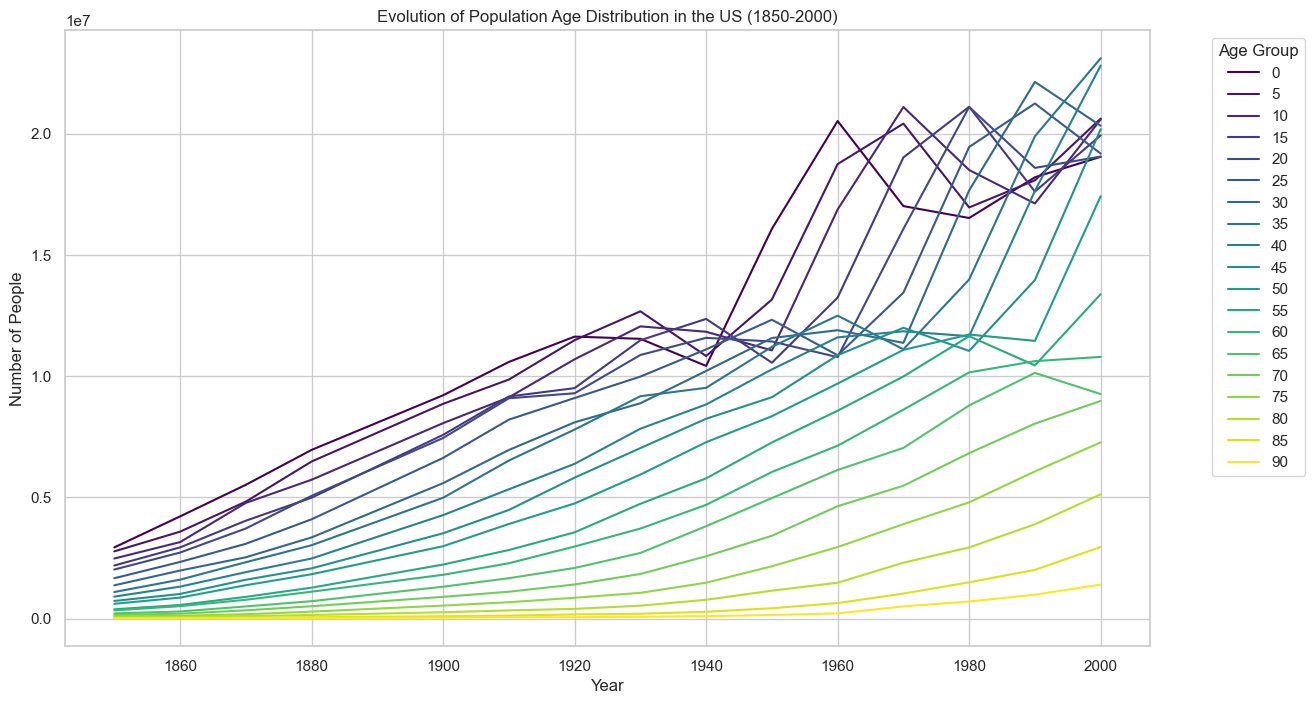

In [5]:
# Setting the style
sns.set(style="whitegrid")

# Aggregating data by year and age to see the total population regardless of sex
age_distribution = population_data.groupby(['year', 'age']).people.sum().reset_index()
print(age_distribution.head())
# Plotting the evolution of age distribution over time
plt.figure(figsize=(14, 8))
sns.lineplot(data=age_distribution, x='year', y='people', hue='age', palette='viridis', legend='full')

plt.title('Evolution of Population Age Distribution in the US (1850-2000)')
plt.xlabel('Year')
plt.ylabel('Number of People')
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


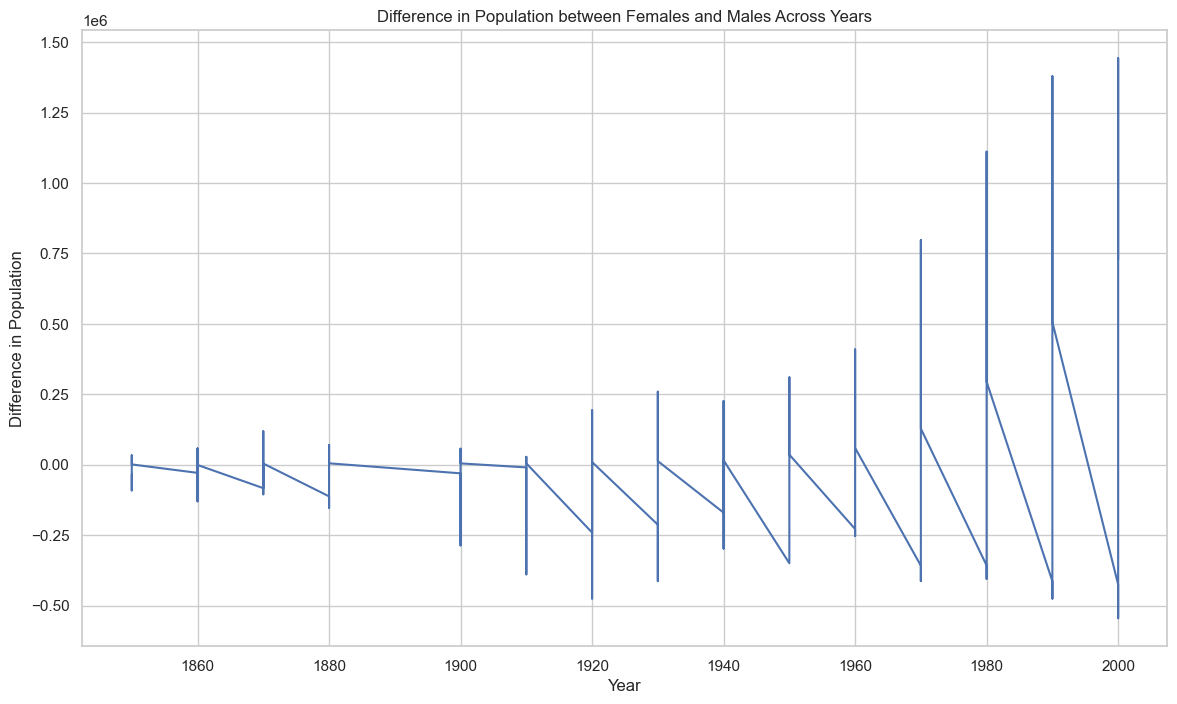

In [21]:
population_data_pivot = population_data.pivot_table(index=['year', 'age'], columns='sex', values='people').reset_index()
population_data_pivot['age_diff'] = (population_data_pivot[2] - population_data_pivot[1])

population_differences = population_data_pivot.reset_index()

plt.figure(figsize=(14, 8))
plt.plot(population_data_pivot['year'], population_data_pivot['age_diff'])
plt.title('Difference in Population between Females and Males Across Years')
plt.xlabel('Year')
plt.ylabel('Difference in Population')
plt.grid(True)
plt.show()



# Exercise 2

In [29]:
import numpy as np
import plotly.graph_objects as go

points = np.array([
    [0, 0, 0], [0, 1, 0], [0, 1, 1], [0, 0, 1],
    [1, 0, 0], [1, 1, 0], [1, 1, 1], [1, 0, 1]
], dtype=np.double)

triangles = np.array([
    [0, 1, 2], [0, 2, 3],  
    [4, 6, 5], [4, 7, 6],  
    [1, 5, 6], [1, 6, 2],  
    [0, 4, 5], [0, 5, 1],  
    [0, 3, 7], [0, 7, 4],  
    [3, 2, 6], [3, 6, 7]   
])

fig = go.Figure(data=[
    go.Mesh3d(
        x=points[:, 0],
        y=points[:, 1],
        z=points[:, 2],
        i=triangles[:, 0],
        j=triangles[:, 1],
        k=triangles[:, 2],
        color='blue',
        opacity=0.50
    )
])

fig.update_layout(
    scene=dict(
        xaxis_title='X Axis',
        yaxis_title='Y Axis',
        zaxis_title='Z Axis',
    ), 
    width=700, height=700,)
fig.show()


In [28]:
num_r = 50
num_theta = 100 

r = np.linspace(0, 1, num_r)
theta = np.linspace(0, 2 * np.pi, num_theta)

r_grid, theta_grid = np.meshgrid(r, theta)

x = r_grid * np.cos(theta_grid)
y = r_grid * np.sin(theta_grid)
z = np.zeros_like(x)

triangles = []

def grid_index_to_flat(r_idx, theta_idx):
    return r_idx * num_theta + theta_idx

for i in range(num_r - 1):
    for j in range(num_theta):
        curr = grid_index_to_flat(i, j)
        right = grid_index_to_flat(i, (j + 1) % num_theta)
        upper = grid_index_to_flat(i + 1, j)
        upper_right = grid_index_to_flat(i + 1, (j + 1) % num_theta)

        triangles.append([curr, right, upper])
        triangles.append([right, upper_right, upper])

mesh = go.Mesh3d(
    x=x.flatten(),
    y=y.flatten(),
    z=z.flatten(),
    i=[t[0] for t in triangles],
    j=[t[1] for t in triangles],
    k=[t[2] for t in triangles],
    opacity=0.5,
    color='lightblue'
)

layout = go.Layout(
    title="Triangular Mesh Approximation of the Unit Disk",
    scene=dict(
        xaxis=dict(title="X"),
        yaxis=dict(title="Y"),
        zaxis=dict(title="Z")
    ),
    width=700, height=700,
)

fig = go.Figure(data=[mesh], layout=layout)
fig.show()


In [11]:
import numpy as np
import plotly.graph_objects as go

theta = np.linspace(0, 2*np.pi, 100)
z = np.linspace(0, 1, 50)
theta_grid, z_grid = np.meshgrid(theta, z)

x = np.cos(theta_grid)
y = np.sin(theta_grid)

fig = go.Figure(data=[go.Surface(x=x, y=y, z=z_grid)])
fig.update_layout(title="Mesh of the Cylinder Surface", autosize=False,
                  width=700, height=700,
                  margin=dict(l=65, r=50, b=65, t=90))

fig.show()
